importamos las librerias necesarias

In [518]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # nos ayudara a graficar 
import seaborn as sns
from sklearn.model_selection import train_test_split # usaremos para separar los datos de  train y test
from sklearn import metrics
from sklearn.linear_model import LogisticRegression # improtamos el modelo logistico 

#Importamos los paquetes
from sklearn.preprocessing import StandardScaler #noa ayudara para scalar los datos 

from sklearn.metrics import confusion_matrix, classification_report  #nos ayudara a mostrar la matrix de confusion 

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.over_sampling import SMOTE  # nos ayudara a balancear nuestros datos 

from sklearn.preprocessing import MinMaxScaler

damos un vistado al archvivo E-Commerce_test.xlsx y comprobamos que no tiene ningun dato faltante 

In [519]:
df_test = pd.read_excel("..\PI01-2\E-Commerce_test.xlsx")
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2000 non-null   int64 
 1   Warehouse_block      2000 non-null   object
 2   Mode_of_Shipment     2000 non-null   object
 3   Customer_care_calls  2000 non-null   int64 
 4   Customer_rating      2000 non-null   int64 
 5   Cost_of_the_Product  2000 non-null   int64 
 6   Prior_purchases      2000 non-null   int64 
 7   Product_importance   2000 non-null   object
 8   Gender               2000 non-null   object
 9   Discount_offered     2000 non-null   int64 
 10  Weight_in_gms        2000 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 172.0+ KB


damos un vistado al archvivo E-Commerce_test.xlsx y comprobamos que no tiene ningun dato faltante 

In [520]:
df_train = pd.read_excel("..\PI01-2\E-Commerce_train.xlsx")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


unimos nuestros  dos dataframe  para poder hacer mas facil el analis

In [521]:
df = pd.concat([df_train, df_test])
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1.0
1,2,F,Flight,4,5,216,2,low,M,59,3088,1.0
2,3,A,Flight,2,2,183,4,low,M,48,3374,1.0
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1.0
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,10995,A,Ship,4,1,252,5,medium,F,1,1538,NaN
1996,10996,B,Ship,4,1,232,5,medium,F,6,1247,NaN
1997,10997,C,Ship,5,4,242,5,low,F,4,1155,NaN
1998,10998,F,Ship,5,2,223,6,medium,M,2,1210,NaN


mostramos las cantidad de datos 

In [522]:
df.shape

(10999, 12)

vemos la informacion que tiene nuestro nuevo dataframe 

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10999 non-null  object 
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10999 non-null  int64  
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10999 non-null  object 
 8   Gender               10999 non-null  object 
 9   Discount_offered     10999 non-null  int64  
 10  Weight_in_gms        10999 non-null  int64  
 11  Reached.on.Time_Y.N  8999 non-null   float64
dtypes: float64(1), int64(7), object(4)
memory usage: 1.1+ MB


relizaremos un cambio de valores a nuestros datos en la tabla "Product_importance"
#cambiamos los valors para la columna Product_importance  , low=3 , medium =2 ,high =1

In [524]:
#cambiamos los valors para la columna Product_importance  , low=3 , medium =2 ,high =1
df["Product_importance"]  =df["Product_importance"].replace(["low"],3)
df["Product_importance"]  =df["Product_importance"].replace(["medium"],2)
df["Product_importance"]  =df["Product_importance"].replace(["high"],1)


relizaremos un cambio de valores a nuestros datos en la tabla "Mode_of_Shipment"
#cambiamos los valors para la columna Product_importance  , Flight=2 , Ship =2 ,Road =3

In [525]:
#cambiamos los valors para la columna Product_importance  , Flight=2 , Ship =2 ,Road =3
df["Mode_of_Shipment"]  =df["Mode_of_Shipment"].replace(["Flight"],1)
df["Mode_of_Shipment"]  =df["Mode_of_Shipment"].replace(["Ship"],2)
df["Mode_of_Shipment"]  =df["Mode_of_Shipment"].replace(["Road"],3)


converirmos neustra tabla "Warehouse_block" en valores numericos con la funcion ord

In [526]:
#converitmos el campo Warehouse_block por valores numericos 
df["Warehouse_block"] = np.vectorize(ord)(df["Warehouse_block"])

convertimos en valores enteros  nuestra columna "gender" 

In [527]:
#eliminamos la columna ID y gender
#df=df.drop(['ID'], axis=1)
#df=df.drop(['Gender'], axis=1)

df["Gender"]  =df["Gender"].replace(["F"],1)
df["Gender"]  =df["Gender"].replace(["M"],0)

renombramos nuestra columnaa 'Reached.on.Time_Y.N" por Reached

In [528]:
# renombramos el nombre de la columna eached.on.Time_Y.N por eached
df.rename(columns={'Reached.on.Time_Y.N':'Reached_on_Time_Y_N',},inplace=True)



vizulizamos nuestro neuvo dataframe 

In [529]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
0,1,68,1,4,2,177,3,3,1,44,1233,1.0
1,2,70,1,4,5,216,2,3,0,59,3088,1.0
2,3,65,1,2,2,183,4,3,0,48,3374,1.0
3,4,66,1,3,3,176,4,2,0,10,1177,1.0
4,5,67,1,2,2,184,3,2,1,46,2484,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,10995,65,2,4,1,252,5,2,1,1,1538,NaN
1996,10996,66,2,4,1,232,5,2,1,6,1247,NaN
1997,10997,67,2,5,4,242,5,3,1,4,1155,NaN
1998,10998,70,2,5,2,223,6,2,0,2,1210,NaN


visualizamos en un histograma  la variable a predecir  

<AxesSubplot:>

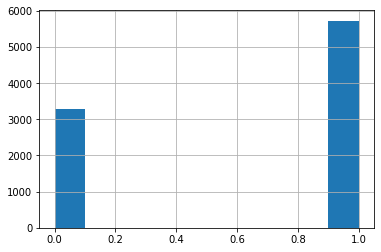

In [530]:
df.Reached_on_Time_Y_N.hist()

Analizamos que nuestra columna Discount_offered no tenga datos atipicos 

(array([], dtype=int64),)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount_offered'>

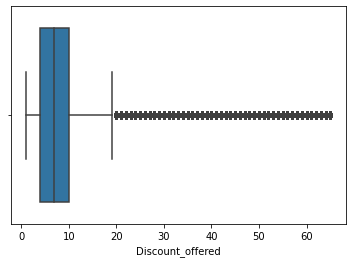

In [531]:
print(np.where(df['Discount_offered']>65))
sns.boxplot(df['Discount_offered'])


AHORA VOLVEMOS A SEPARAR NUESTROS DAFRAME QUE UNIMO AL PRINCIPIO ESTA VEZ YA SE ENCUENTRAN EN FORMATO NUMERICO TODOS NUESTROS CAMPOS 

volvemos a separar nuestros datos ya convertido en numeros 

nuetro primer dataframe se llamara  data_train que son los datos de nuestor archivo de entrenamiento 

In [532]:
data_train = df.dropna()
data_train['Reached_on_Time_Y_N'] = data_train['Reached_on_Time_Y_N'].astype(np.int64)
data_train=data_train.drop(['ID'], axis=1)
data_train.count()

C:\Users\User\AppData\Local\Temp\ipykernel_5060\1080087786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Reached_on_Time_Y_N'] = data_train['Reached_on_Time_Y_N'].astype(np.int64)


Warehouse_block        8999
Mode_of_Shipment       8999
Customer_care_calls    8999
Customer_rating        8999
Cost_of_the_Product    8999
Prior_purchases        8999
Product_importance     8999
Gender                 8999
Discount_offered       8999
Weight_in_gms          8999
Reached_on_Time_Y_N    8999
dtype: int64

nuestro  segundo dataframe  se llamara data_test el cual contiene datos del archivo test 

In [533]:
data_test = df.iloc[8999:] # tomamos todos los datos apartir del 8999 para neustro dataframe data_test
data_test=data_test.drop(['Reached_on_Time_Y_N'], axis=1)
data_test=data_test.drop(['ID'], axis=1)
data_test


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,70,2,5,1,189,2,2,0,10,5248
1,68,2,5,3,150,2,1,1,9,4446
2,70,2,3,3,200,3,3,0,3,5739
3,65,2,5,1,133,2,2,0,1,4643
4,66,2,4,2,260,3,3,0,4,5504
...,...,...,...,...,...,...,...,...,...,...
1995,65,2,4,1,252,5,2,1,1,1538
1996,66,2,4,1,232,5,2,1,6,1247
1997,67,2,5,4,242,5,3,1,4,1155
1998,70,2,5,2,223,6,2,0,2,1210


PROCEDEREMOS A VER LAS CORRELACIONES QUE EXISTEN CON NUESTRAS VARIABLE  

nos fijamos cuatos datos tenemos 1 y 0  del campo Reached_on_Time_Y_N

In [534]:
data_train.Reached_on_Time_Y_N.value_counts()

1    5719
0    3280
Name: Reached_on_Time_Y_N, dtype: int64

pocentaje de 0 y 1 

In [535]:
data_train.Reached_on_Time_Y_N.value_counts()/data_train.shape[0]

1    0.635515
0    0.364485
Name: Reached_on_Time_Y_N, dtype: float64

mostramos las correlaciones de nuestra dataframe data_train 

In [536]:
from funpymodeling.exploratory import corr_pair
res=corr_pair(data_train)
res.head(13)

,v1,v2,R,R2
1,Mode_of_Shipment,Warehouse_block,-0.000070,4.892496e-09
2,Customer_care_calls,Warehouse_block,0.007160,5.126911e-05
3,Customer_rating,Warehouse_block,0.003795,1.440048e-05
4,Cost_of_the_Product,Warehouse_block,-0.010159,1.031990e-04
5,Prior_purchases,Warehouse_block,-0.010097,1.019503e-04
6,Product_importance,Warehouse_block,0.005282,2.789974e-05
7,Gender,Warehouse_block,0.000414,1.712234e-07
8,Discount_offered,Warehouse_block,0.013715,1.881143e-04
9,Weight_in_gms,Warehouse_block,0.005122,2.623592e-05
10,Reached_on_Time_Y_N,Warehouse_block,0.002182,4.759425e-06


calculamos la correlacion que tiene todas nuestras variables 

In [537]:
res_target_ordered=res[res['v2']=='Reached_on_Time_Y_N'].sort_values('R2', ascending=False)
res_target_ordered

,v1,v2,R,R2
118,Discount_offered,Reached_on_Time_Y_N,0.416357,0.173353
119,Weight_in_gms,Reached_on_Time_Y_N,-0.326877,0.106849
114,Cost_of_the_Product,Reached_on_Time_Y_N,-0.083470,0.006967
112,Customer_care_calls,Reached_on_Time_Y_N,-0.072261,0.005222
115,Prior_purchases,Reached_on_Time_Y_N,-0.048269,0.002330
111,Mode_of_Shipment,Reached_on_Time_Y_N,-0.016414,0.000269
116,Product_importance,Reached_on_Time_Y_N,-0.014361,0.000206
113,Customer_rating,Reached_on_Time_Y_N,0.011045,0.000122
117,Gender,Reached_on_Time_Y_N,-0.002881,0.000008
110,Warehouse_block,Reached_on_Time_Y_N,0.002182,0.000005


mostramos todas las variable que no tiene correlacion con Reached_on_Time_Y_N que son

In [538]:
res_target_ordered[res_target_ordered['R2']<0.05]['v1']
res_target_ordered

,v1,v2,R,R2
118,Discount_offered,Reached_on_Time_Y_N,0.416357,0.173353
119,Weight_in_gms,Reached_on_Time_Y_N,-0.326877,0.106849
114,Cost_of_the_Product,Reached_on_Time_Y_N,-0.083470,0.006967
112,Customer_care_calls,Reached_on_Time_Y_N,-0.072261,0.005222
115,Prior_purchases,Reached_on_Time_Y_N,-0.048269,0.002330
111,Mode_of_Shipment,Reached_on_Time_Y_N,-0.016414,0.000269
116,Product_importance,Reached_on_Time_Y_N,-0.014361,0.000206
113,Customer_rating,Reached_on_Time_Y_N,0.011045,0.000122
117,Gender,Reached_on_Time_Y_N,-0.002881,0.000008
110,Warehouse_block,Reached_on_Time_Y_N,0.002182,0.000005


----------------------------------------------------------------------------------------------------------------------------------------

<AxesSubplot:>

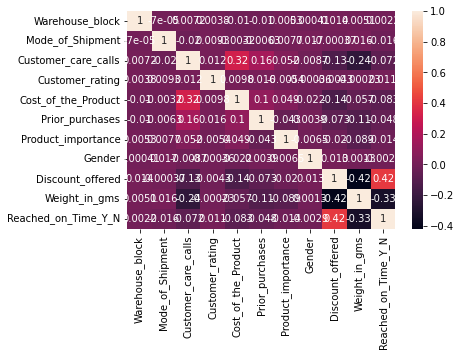

In [539]:
correlacion = data_train.corr()
sns.heatmap(correlacion, annot=True)

regresion logistica - con MinMaxScaler


In [540]:
#feature_cols = ["Customer_care_calls","Cost_of_the_Product","Discount_offered","Weight_in_gms"]#filtramos nuestras columnas que nso ayudaran a entrenar el modelo 

feature_cols = ["Cost_of_the_Product","Customer_care_calls","Prior_purchases"]#filtramos nuestras columnas que nso ayudaran a entrenar el modelo 
x = data_train[feature_cols]
y = data_train.Reached_on_Time_Y_N
# ahora dividiremos nuestros datos para el train y test 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 52)

sm = SMOTE() 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 

In [541]:
#scalamos nustros datos 
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_train_res = ms.fit_transform(X_train)
X_test = ms.fit_transform(X_test)

In [542]:
#entrenamos nuestro modelo  logistico
modelo_logistico = LogisticRegression() #
modelo_logistico.fit(X_train_res, y_train) #entrenamos 
predictions = modelo_logistico.predict(X_test) # predecimos 

print(classification_report(y_test, predictions)) #
cm=confusion_matrix(y_test,predictions)#mostramos la matris de confucion para ver cuantos datos estna prediciendo  0 y 1
print(cm)

from sklearn.metrics import recall_score
print('El score del modelo es:', recall_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.67      0.00      0.00       840
           1       0.63      1.00      0.77      1410

    accuracy                           0.63      2250
   macro avg       0.65      0.50      0.39      2250
weighted avg       0.64      0.63      0.48      2250

[[   2  838]
 [   1 1409]]
El score del modelo es: 0.999290780141844


In [543]:

feature_cols = ["Customer_care_calls","Cost_of_the_Product","Discount_offered","Weight_in_gms"]#filtramos nuestras columnas que nso ayudaran a entrenar el modelo 

x = data_train[feature_cols]
y = data_train.Reached_on_Time_Y_N
#entrenamos nuestro modelo  logistico
modelo_logistico = LogisticRegression() #
modelo_logistico.fit(x, y) #entrenamos 

LogisticRegression()

SE MUESTRAN LOS COEFICIENTES DEL MODELO 

In [544]:
modelo_logistico.coef_ #estos son los parametros quemejor ajustan al modelo 

array([[-0.151347  , -0.00238617,  0.11595508, -0.00028944]])

calculamos el recall

In [545]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

recall = TP / float(TP + FN)

print('Recall  : {0:0.4f}'.format(recall))

Recall  : 0.6667


utilizaremos nuestro dataframe data_test que contiene datos para pedecir , escogemos  las mismas columnas a la hora  de entrenarlo 

In [546]:
data_test= data_test[feature_cols]
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
data_test = ms.fit_transform(data_test)

predictions_test = modelo_logistico.predict(data_test) #predecimos con el modelo 
print (predictions_test)

[1 1 1 ... 1 1 1]


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


creamos un dataframe para almecenar nuestros resultados 

In [547]:
from sklearn.metrics import accuracy_score 
from  sklearn.metrics import  confusion_matrix
columnas = ['pred'] # definimos los nombres de las columnas
df_predic = pd.DataFrame(predictions_test,columns=columnas) 
df_predic.to_csv("josleo.csv",index=False)#exportamos los resutladoresultadoss 

In [548]:
from funpymodeling.exploratory import corr_pair